In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
[문제01]
'''

'\n[문제01]\n'

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
'''
[문제02]
'''

'\n[문제02]\n'

In [5]:
yield_df = pd.read_csv("data/4_manufacturing_yield.csv")
yield_df.describe()


,temp_sensor_1,pressure_sensor,humidity,vibration_sensor,processing_time_sec,power_consumption,operator_experience_years,yield_percentage
count,1953.000000,1929.000000,1933.000000,2000.000000,1937.000000,2000.000000,2000.00000,2000.000000
mean,99.956001,50.009907,50.068148,0.997867,120.214042,198.165180,5.58350,94.420420
std,5.103861,2.045517,11.710720,0.194692,9.808000,21.852483,2.83179,1.113597
min,82.880000,42.830000,30.010000,0.343300,85.400000,121.530000,1.00000,91.200000
25%,96.580000,48.590000,39.990000,0.862225,113.700000,183.797500,3.00000,93.590000
50%,100.020000,50.030000,49.970000,1.009700,120.100000,198.200000,6.00000,94.440000
75%,103.380000,51.400000,60.350000,1.125175,126.700000,212.747500,8.00000,95.262500
max,121.310000,58.440000,70.000000,1.604000,158.600000,263.580000,10.00000,97.430000


In [6]:
답안02 = 3

In [7]:
'''
[문제03]
'''

'\n[문제03]\n'

<Axes: xlabel='processing_time_sec', ylabel='yield_percentage'>

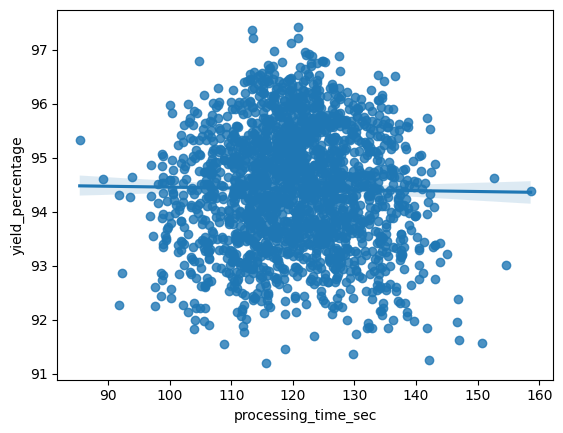

In [8]:
sns.regplot(data=yield_df, x='processing_time_sec', y='yield_percentage')

In [9]:
'''
[문제04]
'''

'\n[문제04]\n'

In [10]:
cross_table = pd.crosstab(yield_df['production_line'],yield_df['material_type'])
print(cross_table)

material_type    Type-X  Type-Y  Type-Z
production_line                        
Line-A              357     298     294
Line-B              363     347     341


In [11]:
'''
[문제05]
'''

'\n[문제05]\n'

In [12]:
sensor_means = yield_df.groupby('production_line')[['temp_sensor_1','pressure_sensor','humidity','vibration_sensor']].mean()
print(sensor_means)


                 temp_sensor_1  pressure_sensor   humidity  vibration_sensor
production_line                                                             
Line-A               99.696071        49.992863  49.928922          0.996887
Line-B              100.191816        50.025064  50.196706          0.998752


In [13]:
'''
[문제06]
'''

'\n[문제06]\n'

In [14]:
yield_df.isnull().sum()

production_line               0
material_type                 0
temp_sensor_1                47
pressure_sensor              71
humidity                     67
vibration_sensor              0
processing_time_sec          63
power_consumption             0
operator_experience_years     0
yield_percentage              0
dtype: int64

In [15]:
yield_pre = yield_df.copy()
null_col = ['temp_sensor_1','pressure_sensor','humidity','processing_time_sec']
for col in null_col:
    mean_val = yield_pre[col].mean()
    yield_pre[col].fillna(mean_val, inplace=True)

yield_pre.isnull().sum()

production_line              0
material_type                0
temp_sensor_1                0
pressure_sensor              0
humidity                     0
vibration_sensor             0
processing_time_sec          0
power_consumption            0
operator_experience_years    0
yield_percentage             0
dtype: int64

In [16]:
'''
[문제07]
'''

'\n[문제07]\n'

In [17]:
yield_pre.head()

,production_line,material_type,temp_sensor_1,pressure_sensor,humidity,vibration_sensor,processing_time_sec,power_consumption,operator_experience_years,yield_percentage
0,Line-B,Type-X,94.97,50.93,57.93,0.5828,116.700000,233.75,3.0,94.02
1,Line-A,Type-X,99.09,50.37,51.29,0.9396,120.214042,199.01,6.0,94.82
2,Line-A,Type-X,101.39,51.77,67.43,0.9908,118.600000,207.59,9.0,96.08
3,Line-B,Type-Y,100.32,49.27,37.91,1.3588,115.000000,213.31,10.0,96.57
4,Line-A,Type-X,105.25,54.07,45.86,0.9597,121.000000,192.11,9.0,94.80


In [18]:
yield_encoded = pd.get_dummies(yield_pre, columns=['production_line','material_type'], dtype=int)
yield_encoded.head()

,temp_sensor_1,pressure_sensor,humidity,vibration_sensor,processing_time_sec,power_consumption,operator_experience_years,yield_percentage,production_line_Line-A,production_line_Line-B,material_type_Type-X,material_type_Type-Y,material_type_Type-Z
0,94.97,50.93,57.93,0.5828,116.700000,233.75,3.0,94.02,0,1,1,0,0
1,99.09,50.37,51.29,0.9396,120.214042,199.01,6.0,94.82,1,0,1,0,0
2,101.39,51.77,67.43,0.9908,118.600000,207.59,9.0,96.08,1,0,1,0,0
3,100.32,49.27,37.91,1.3588,115.000000,213.31,10.0,96.57,0,1,0,1,0
4,105.25,54.07,45.86,0.9597,121.000000,192.11,9.0,94.80,1,0,1,0,0


In [19]:
'''
[문제08]
'''

'\n[문제08]\n'

In [20]:
from sklearn.model_selection import train_test_split

X = yield_encoded.drop(['yield_percentage'], axis=1)
y = yield_encoded['yield_percentage']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2024)

print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(1500, 12) (500, 12)
(1500,) (500,)


In [21]:
'''
[문제09]
'''

'\n[문제09]\n'

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [23]:
'''
[문제10]
'''

'\n[문제10]\n'

In [24]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=5,random_state=2024)
model_dt.fit(X_train_scaled, y_train)
dt_pred = model_dt.predict(X_valid_scaled)

In [25]:
'''
[문제11]
'''

'\n[문제11]\n'

In [26]:
from sklearn.linear_model import ElasticNet

model_en = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=2024)
model_en.fit(X_train_scaled, y_train)
en_pred = model_en.predict(X_valid_scaled)

In [27]:
'''
[문제12]
'''

'\n[문제12]\n'

In [28]:
from sklearn.metrics import mean_absolute_error, r2_score

dt_mae = mean_absolute_error(dt_pred, y_valid)
dt_r2 = r2_score(dt_pred, y_valid)

en_mae = mean_absolute_error(en_pred, y_valid)
en_r2 = r2_score(en_pred, y_valid)

print(f"DecisionTreeRegressor MAE : {dt_mae:.4f} | DecisionTreeRegressor R2 : {dt_r2:.4f}")
print(f"ElasticNet MAE :            {en_mae:.4f} |            ElasticNet R2 : {en_r2:.4f}")

DecisionTreeRegressor MAE : 0.5659 | DecisionTreeRegressor R2 : 0.3642
ElasticNet MAE :            0.5543 |            ElasticNet R2 : 0.1166


In [29]:
'''
[문제13]
'''

'\n[문제13]\n'

In [31]:
X_train_scaled.shape

(1500, 12)

In [32]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_dl = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model_dl.compile(optimizer='adam', loss='mean_squared_error')

history = model_dl.fit(
    X_train_scaled, y_train,
    epochs = 100,
    batch_size=32,
    validation_data = (X_valid_scaled, y_valid)
)

print("딥러닝 모델 학습 완료")
model_dl.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
47/47 [==============================] - 0s 4ms/step - loss: 8642.5332 - val_loss: 8155.2012
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 6719.4565 - val_loss: 4533.0894
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 1892.7540 - val_loss: 183.3808
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 127.4251 - val_loss: 91.2556
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 85.8261 - val_loss: 76.0032
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 72.8576 - val_loss: 65.5278
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 62.7684 - val_loss: 57.3350
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 54.9965 - val_loss: 50.8503
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 48.1964 - val_loss: 45.0347
Epoch 10/100
47/47 [==============================] - 0s 1ms/step - loss: 42.72

0.5682729482650757

In [33]:
'''
[문제14]
'''

'\n[문제14]\n'

In [34]:
new_process_data = np.array([[100.0, 52.0, 60.0, 1.0, 120.0, 200.0, 5.0, 0, 1, 0, 1, 0]])

In [35]:
new_process_scaled = scaler.transform(new_process_data)
predicted_yield_df = model_dl.predict(new_process_scaled)
print(f"새로운 공정 데이터의 예측 수율 : {predicted_yield_df[0][0]:.2f} %")

1/1 [==============================] - 0s 73ms/step
새로운 공정 데이터의 예측 수율 : 95.77 %


/opt/anaconda3/envs/aice/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
new_process_scaled

array([[ 0.02424134,  0.9942146 ,  0.84412989, -0.00207257, -0.03352685,
         0.08615937, -0.18932461, -0.93041477,  0.93041477, -0.75325833,
         1.47807759, -0.69230769]])

In [37]:
predicted_yield_df

array([[95.77196]], dtype=float32)